<a href="https://colab.research.google.com/github/lauranorenab/Proyecto_Modelos_2/blob/main/Preprocesamiento_Car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
import os
from google.colab import files
import scipy.io
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

%matplotlib inline
sns.set(color_codes=True)

En el preprocesamiento del modelo para la evaluación de vehículos, no se llevó a cabo ningún procedimiento de tratamiento de datos atípicos, nulos o duplicados. Esta decisión se tomó ya que en los resultados obtenidos durante el Análisis Exploratorio de Datos (EDA), se determinó que no existían instancias de estas problemáticas en el conjunto de datos.

## Lectura del dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X_car = car_evaluation.data.features
y_car = car_evaluation.data.targets

In [ ]:
# df_car = pd.concat([X_car, y_car], axis=1)

## One Hot Encoding

Esta técnica de es utilizada en el procesamiento de datos, especialmente en el campo del aprendizaje automático. Se aplica porque muchos algoritmos requieren que las entradas sean numéricas, como en este caso. Al convertir las variables categóricas en numéricas, se facilita su procesamiento y comprensión por parte de los algoritmos o métodos aplicados.

Se tranforman las columnas de entrada usando one-hot-encoding

In [ ]:
df_car_categoric_columns = list(X_car.columns)
print(df_car_categoric_columns)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']


In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
# Transforming
transformed = ohe.fit_transform(X_car)
# Transformating back
transformed_df = pd.DataFrame(transformed, columns=ohe.get_feature_names_out())
# One-hot encoding removed an index. Let's put it back:
transformed_df.index = X_car.index
# Joining tables
X_car = pd.concat([X_car, transformed_df], axis=1)
# Dropping old categorical columns
X_car.drop(df_car_categoric_columns, axis=1, inplace=True)
# CHecking result
X_car.columns = X_car.columns.str.replace('onehotencoder__', '')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_car

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1724,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1726,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


Se le asignan códigos, del 0 al 3, a la columna de salida

In [ ]:
y_car['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
# Crear un diccionario de mapeo
mapeo_class = {'vgood':3, 'good':2, 'acc':1, 'unacc':0}

# Aplicar el mapeo a la columna categórica
y_car['class'] = y_car['class'].map(mapeo_class)

# Mostrar el DataFrame resultante
y_car

<ipython-input-8-ad10444b72ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_car['class'] = y_car['class'].map(mapeo_class)


,class
0,0
1,0
2,0
3,0
4,0
...,...
1723,2
1724,3
1725,0
1726,2


In [ ]:
df_car = pd.concat([X_car, y_car], axis=1)
df_car

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,class
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
1724,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3
1725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1726,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2


## Balanceo de clases


El balanceo se utiliza cuando existe una disparidad significativa en la cantidad de ejemplos para cada clase en un conjunto de datos dado. En este apartado se está aplicando diferentes métodos de balanceo para probar cual tiene mejores resultados.

En este caso, se escogieron los métodos:
- **SMOTE**: es una técnica de sobremuestreo, donde se agregan nuevos datos basados en los ejemplos existentes.
- **Near Miss**: es una técnica de submestreo, que en el caso contrario del anterior, se reduce el número de datos para equilibrar el conjunto de datos.


In [ ]:
def mostrarGrafica(y):
  dicto = dict(zip(np.unique(y,return_counts=True)[0], np.unique(y,return_counts=True)[1]))
  fig, ax = plt.subplots()
  ax.bar(dicto.keys(), dicto.values())
  ax.set_title("Número de muestras por clase")
  ax.set_xlabel("etiqueta de la clase")
  ax.set_ylabel("# muestras por clase")
  ax.set_xticks(list(dicto.keys()))
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.show()


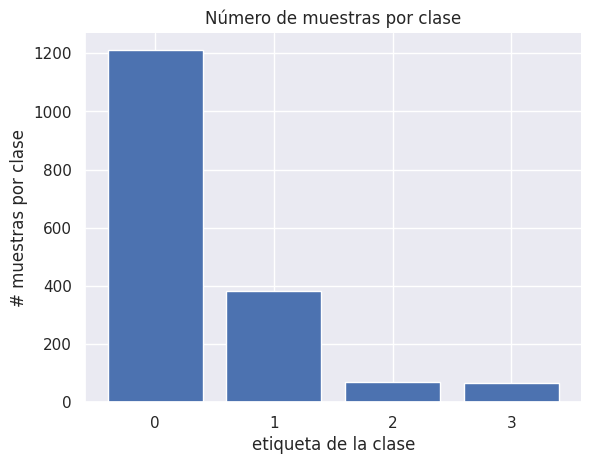

In [ ]:
mostrarGrafica(y_car)

### SMOTE

In [ ]:
sm = SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=5,
)
X_car_smote, y_car_smote = sm.fit_resample(X_car, y_car)

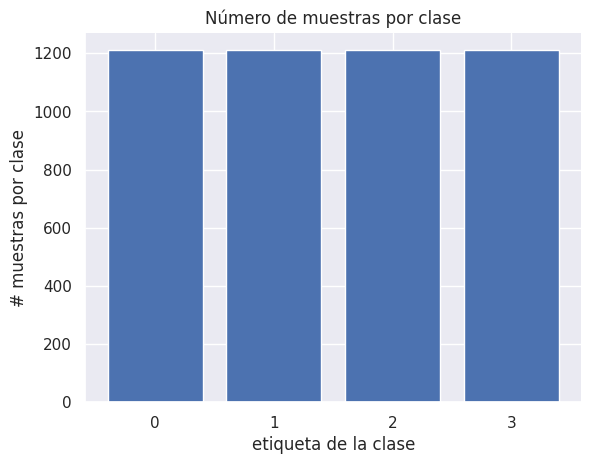

In [ ]:
mostrarGrafica(y_car_smote)

In [ ]:
X_car_smote

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.00000,0.00000,1.0,0.000000,0.000000,0.000000,1.0,1.0,0.000000,...,0.000000,1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.00000,0.00000,1.0,0.000000,0.000000,0.000000,1.0,1.0,0.000000,...,0.000000,1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.00000,0.00000,1.0,0.000000,0.000000,0.000000,1.0,1.0,0.000000,...,0.000000,1.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.00000,0.00000,1.0,0.000000,0.000000,0.000000,1.0,1.0,0.000000,...,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.00000,0.00000,1.0,0.000000,0.000000,0.000000,1.0,1.0,0.000000,...,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4835,0.0,0.00000,1.00000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.356356,...,0.643644,0.0,0.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.0
4836,0.0,1.00000,0.00000,0.0,0.421882,0.000000,0.578118,0.0,1.0,0.000000,...,0.000000,0.0,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0
4837,0.0,1.00000,0.00000,0.0,0.477099,0.522901,0.000000,0.0,0.0,0.000000,...,1.000000,0.0,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
4838,0.0,0.18505,0.81495,0.0,0.000000,0.000000,1.000000,0.0,1.0,0.000000,...,0.000000,0.0,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0


### Near Miss

In [ ]:
nm = NearMiss()
X_car_nm, y_car_nm = nm.fit_resample(X_car, y_car)

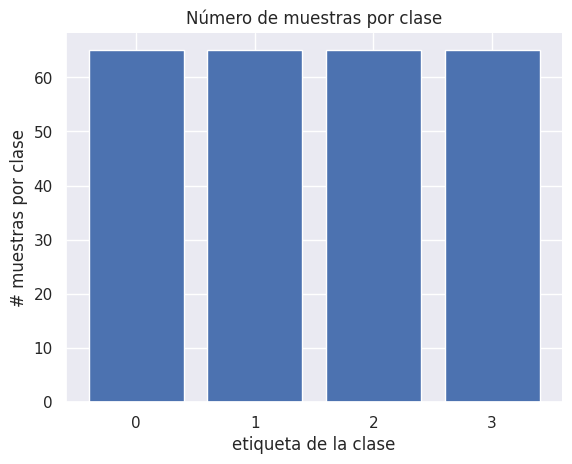

In [ ]:
mostrarGrafica(y_car_nm)

In [ ]:
X_car_nm

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
256,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
257,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
258,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## Descarga del dataset

In [ ]:
def descargarDataframe(X, y, nombre):
  df = pd.concat([X, y], axis=1)
  df.to_csv(nombre+'.csv', index=False)
  files.download(nombre+'.csv')

In [ ]:
descargarDataframe(X=X_car, y=y_car, nombre='car_evaluation disbalanced')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>